In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bacd4a83-6cf2-4581-b4bf-4343aabf5090-agent.csv")

In [33]:
creator = df.groupby(["AgentID"]).last().sort_values(by="Reserve")[-1:]

In [4]:
df1 = df.groupby(["AgentID"]).last().sort_values(by="Reserve")[:-1]
df1

,Step,Supply,Reserve
AgentID,,,
df32a67b-92ce-47ec-86b9-276d7a3835d7,3651,0.023974,0.000078
76a97fe4-d3a6-4eec-8db8-9bf2f34a9c2a,3651,0.024024,0.000394
8cbee216-1d91-4252-a180-a225a0e31eb7,3651,0.025579,0.000453
06f74763-4727-4852-8a00-81dd1c6df548,3651,0.031998,0.000594
1f9cb171-23d6-430c-a2ff-8af54724ffaf,3651,0.026463,0.003854
...,...,...,...
d90e4a59-0fab-457e-abb5-47f825a5b602,3651,0.007584,1652.797050
40cd7e7f-5aa9-4f80-a9f0-77f81237e4dd,3651,0.173819,1687.006645
3a186983-0ea2-4c0c-9dbb-a6f92d854438,3651,0.026862,1768.711407


In [5]:
a = df1["Reserve"].to_numpy()

In [6]:
a.sort()

(array([4.533e+03, 3.670e+02, 7.300e+01, 1.900e+01, 7.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 4.000e+00, 2.000e+00]),
 array([7.84937734e-05, 1.98191914e+02, 3.96383750e+02, 5.94575586e+02,
        7.92767422e+02, 9.90959258e+02, 1.18915109e+03, 1.38734293e+03,
        1.58553477e+03, 1.78372660e+03, 1.98191844e+03]),
 <BarContainer object of 10 artists>)

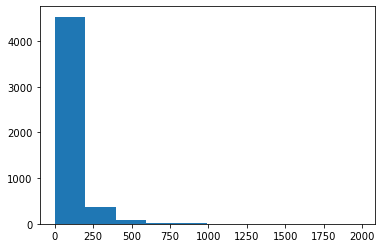

In [45]:
plt.hist(a)

In [47]:
df2 = df.groupby(["AgentID"]).last().sort_values(by="Supply")[:-1]
df2

,Step,Supply,Reserve
AgentID,,,
87b75579-5150-48d7-8131-2da534537a1c,3651,0.000000,100.000000
9eac058a-18f3-48c2-abd5-f4d8d3179947,3651,0.000000,100.000000
1a6a5639-d9dc-4f69-956c-e4f932aabd88,3651,0.000000,100.000000
b100b01e-23d5-4171-95fb-df03ff228a20,3651,0.000000,100.000000
3c49cee1-7a00-4bae-9b26-87ffbfa7f270,3651,0.000000,100.000000
...,...,...,...
352df6b1-be8a-45c3-8a76-a8480b3e35d8,3651,0.356682,317.363519
a9fa2e4b-190a-4b17-8823-deb397249bea,3651,0.358222,127.642892
7a9aaf66-d596-4d5f-b769-ea1cdce52930,3651,0.367282,961.303402


In [17]:
b = df2["Supply"].to_numpy()
b.sort()

(array([4.942e+03, 5.200e+01, 1.300e+01, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.10213295, 0.20426589, 0.30639884, 0.40853179,
        0.51066474, 0.61279768, 0.71493063, 0.81706358, 0.91919652,
        1.02132947]),
 <BarContainer object of 10 artists>)

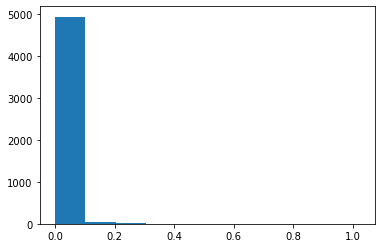

In [44]:
plt.hist(b)

In [37]:
price = 4307.370801729705

In [36]:
# baseline 
creator["Reserve"].to_numpy()[0] + (creator["Supply"].to_numpy()[0] * price)

5202569.441953621

In [42]:
# baseline 100
df1["Reserve"].median() + (df2["Supply"].median() * price)

150.20983307225876

In [72]:
firsts = df.groupby(["AgentID"]).first().sort_values(by="Step").head(2000).index.to_numpy()
df.groupby(["AgentID"]).last().sort_values(by="Reserve").loc[firsts].mean()

Step       3651.000000
Supply        0.635467
Reserve     161.851763
dtype: float64

In [73]:
lasts = df.groupby(["AgentID"]).first().sort_values(by="Step").tail(2000).index.to_numpy()
df.groupby(["AgentID"]).last().sort_values(by="Reserve").loc[lasts].mean()

Step       3651.000000
Supply        0.012526
Reserve      57.355569
dtype: float64